In [32]:
root_folder: Path = Path('C:/Users/siddh/OneDrive/Desktop/Projects/Colrorize grayscale images using DeOldify/')

In [33]:
import os
os.environ['DEOLDIFY_MODELS'] = r"C:\Users\siddh\OneDrive\Desktop\Projects\Colrorize grayscale images using DeOldify\models"

In [34]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import gradio
from deoldify.visualize import *
import warnings
warnings.filterwarnings("ignore")

In [35]:
grayscale_img = cv2.imread("C:/Users/siddh/OneDrive/Desktop/Projects/Colrorize grayscale images using DeOldify/test_case_images/test_case_1.jpg")

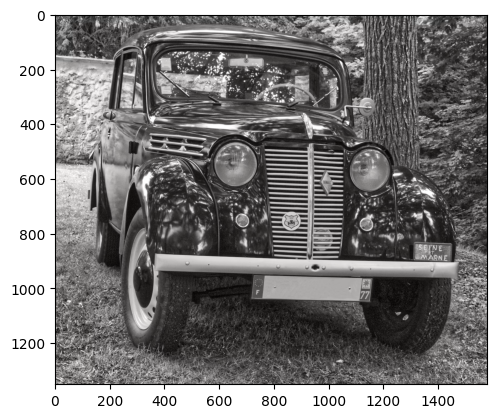

In [36]:
plt.imshow(grayscale_img)

In [40]:
def colorize_image(grayscale_img, render_factor):
    colorizer = get_image_colorizer()
    colored_image = colorizer.get_transformed_image(grayscale_img, render_factor=render_factor, watermarked=False)
    colored_image = np.asarray(colored_image)
    target_size = (int(colored_image.shape[1]*0.5), int(colored_image.shape[0] * 0.5))
    height, width = colored_image.shape[:2]
    scale_factor = min( target_size[0] / width , target_size[1], height)
    colored_image = cv2.resize(colored_image, None, fx=scale_factor, fy=scale_factor)
    return colored_image

    # plt.imshow(colored_image)

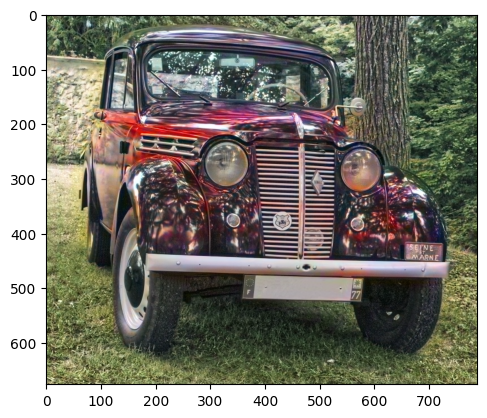

In [41]:
img = "C:/Users/siddh/OneDrive/Desktop/Projects/Colrorize grayscale images using DeOldify/test_case_images/test_case_1.jpg"
colored_image  = colorize_image(img, 12)
plt.imshow(colored_image)

In [42]:
def RGB_image(grayscale_img, render_factor):
    colored_image = colorize_image(grayscale_img, render_factor)
    r, g, b = cv2.split(colored_image)
    zeros = np.zeros(r.shape, np.uint8)
    r_colorized = cv2.merge((r, zeros, zeros))
    g_colorized = cv2.merge((zeros, g, zeros))
    b_colorized = cv2.merge((zeros, zeros, b))

    return [r_colorized, g_colorized, b_colorized]

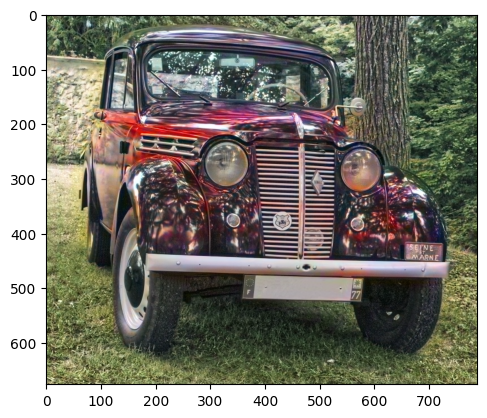

In [50]:
r, g ,b = RGB_image(img, 12)
merged_image = r+g+b
plt.imshow(merged_image)


In [56]:
all_images = [ r, g, b ,merged_image]
titles = ["red_image", "green_image", "blue_image","merged_image"]
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

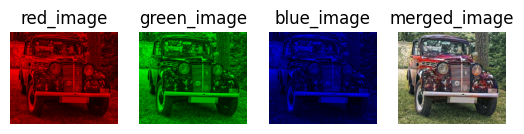

In [57]:
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(all_images[i])
    plt.title(titles[i])
    plt.axis('off')

plt.show()

In [58]:
examples = [f"C:/Users/siddh/OneDrive/Desktop/Projects/Colrorize grayscale images using DeOldify/test_case_images/test_case_{i}.jpg" for i in range(1,5)]

In [59]:
examples

['C:/Users/siddh/OneDrive/Desktop/Projects/Colrorize grayscale images using DeOldify/test_case_images/test_case_1.jpg',
 'C:/Users/siddh/OneDrive/Desktop/Projects/Colrorize grayscale images using DeOldify/test_case_images/test_case_2.jpg',
 'C:/Users/siddh/OneDrive/Desktop/Projects/Colrorize grayscale images using DeOldify/test_case_images/test_case_3.jpg',
 'C:/Users/siddh/OneDrive/Desktop/Projects/Colrorize grayscale images using DeOldify/test_case_images/test_case_4.jpg']

In [64]:
with gradio.Blocks() as demo:
    with gradio.Row():
        image = gradio.Image(label="Image to convert", show_label=True, type="filepath")
        slider = gradio.Slider(minimum=7, maximum=40, value=12, step=1, label="Render Factor", show_label=True)
    gradio.Markdown('## Image Examples')
    gradio.Examples(
        examples=examples,
        inputs=image
    )

    bt1= gradio.Button(value="Get R G B channels", scale=2)
    rgb_gallery = gradio.Gallery(label="Generated Images(RGB)", columns=[3], rows=[1], object_fit="contain", height="auto")
    bt1.click(RGB_image, inputs=[image, slider], outputs=[rgb_gallery])


    btn2 = gradio.Button(value="Get colorized image", scale=2)
    colored_image =gradio.Image(label="Colorized Image",width=850,height=1024)
    btn2.click(colorize_image, inputs=[image, slider], outputs=[colored_image])

    gradio.ClearButton([rgb_gallery, colored_image])

if __name__=="__main__":
    demo.launch(debug=True, share=True, server_name="0.0.0.0", server_port=3000)

Running on local URL:  http://0.0.0.0:3000
HTTP Request: GET https://api.gradio.app/pkg-version "HTTP/1.1 200 OK"
HTTP Request: GET http://localhost:3000/startup-events "HTTP/1.1 200 OK"
HTTP Request: HEAD http://localhost:3000/ "HTTP/1.1 200 OK"
HTTP Request: GET https://api.gradio.app/v2/tunnel-request "HTTP/1.1 200 OK"
Running on public URL: https://b7cfeaaf8c179ead1c.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
HTTP Request: HEAD https://b7cfeaaf8c179ead1c.gradio.live "HTTP/1.1 200 OK"


Keyboard interruption in main thread... closing server.
Killing tunnel 0.0.0.0:3000 <> https://b7cfeaaf8c179ead1c.gradio.live
